# Adjusting the Colormap Scale Range

Initially, a suitable colormap for the animated plot was sought. After considering various options, three colormaps were found to yield the most favorable outcomes for the intended purpose: "CMRmap," "inferno," and "Spectral." To modify the color progression, the "Spectral" colormap was reversed using the "Spectral_r" variant. This alteration facilitated the transition from red for lower values to blue for higher values.

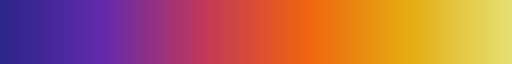

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
from IPython import display
import time

CMRcolors = sns.color_palette("CMRmap")
CMRmap = mcolors.LinearSegmentedColormap.from_list('CMRmap', CMRcolors); CMRmap

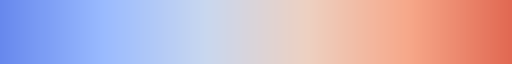

In [2]:
coolwarmcolors = sns.color_palette("coolwarm")
coolwarm = mcolors.LinearSegmentedColormap.from_list('coolwarm', coolwarmcolors); coolwarm

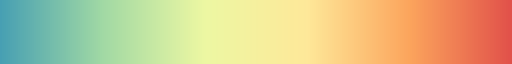

In [3]:
Spectralcolors = sns.color_palette("Spectral_r")
Spectral = mcolors.LinearSegmentedColormap.from_list('Spectral_r', Spectralcolors); Spectral



The first version of the animated plot revealed a very homogeneous appearance, except for the central region, raising suspicion of the presence of extreme outliers. The used colormap in this example was "Spectral_r".

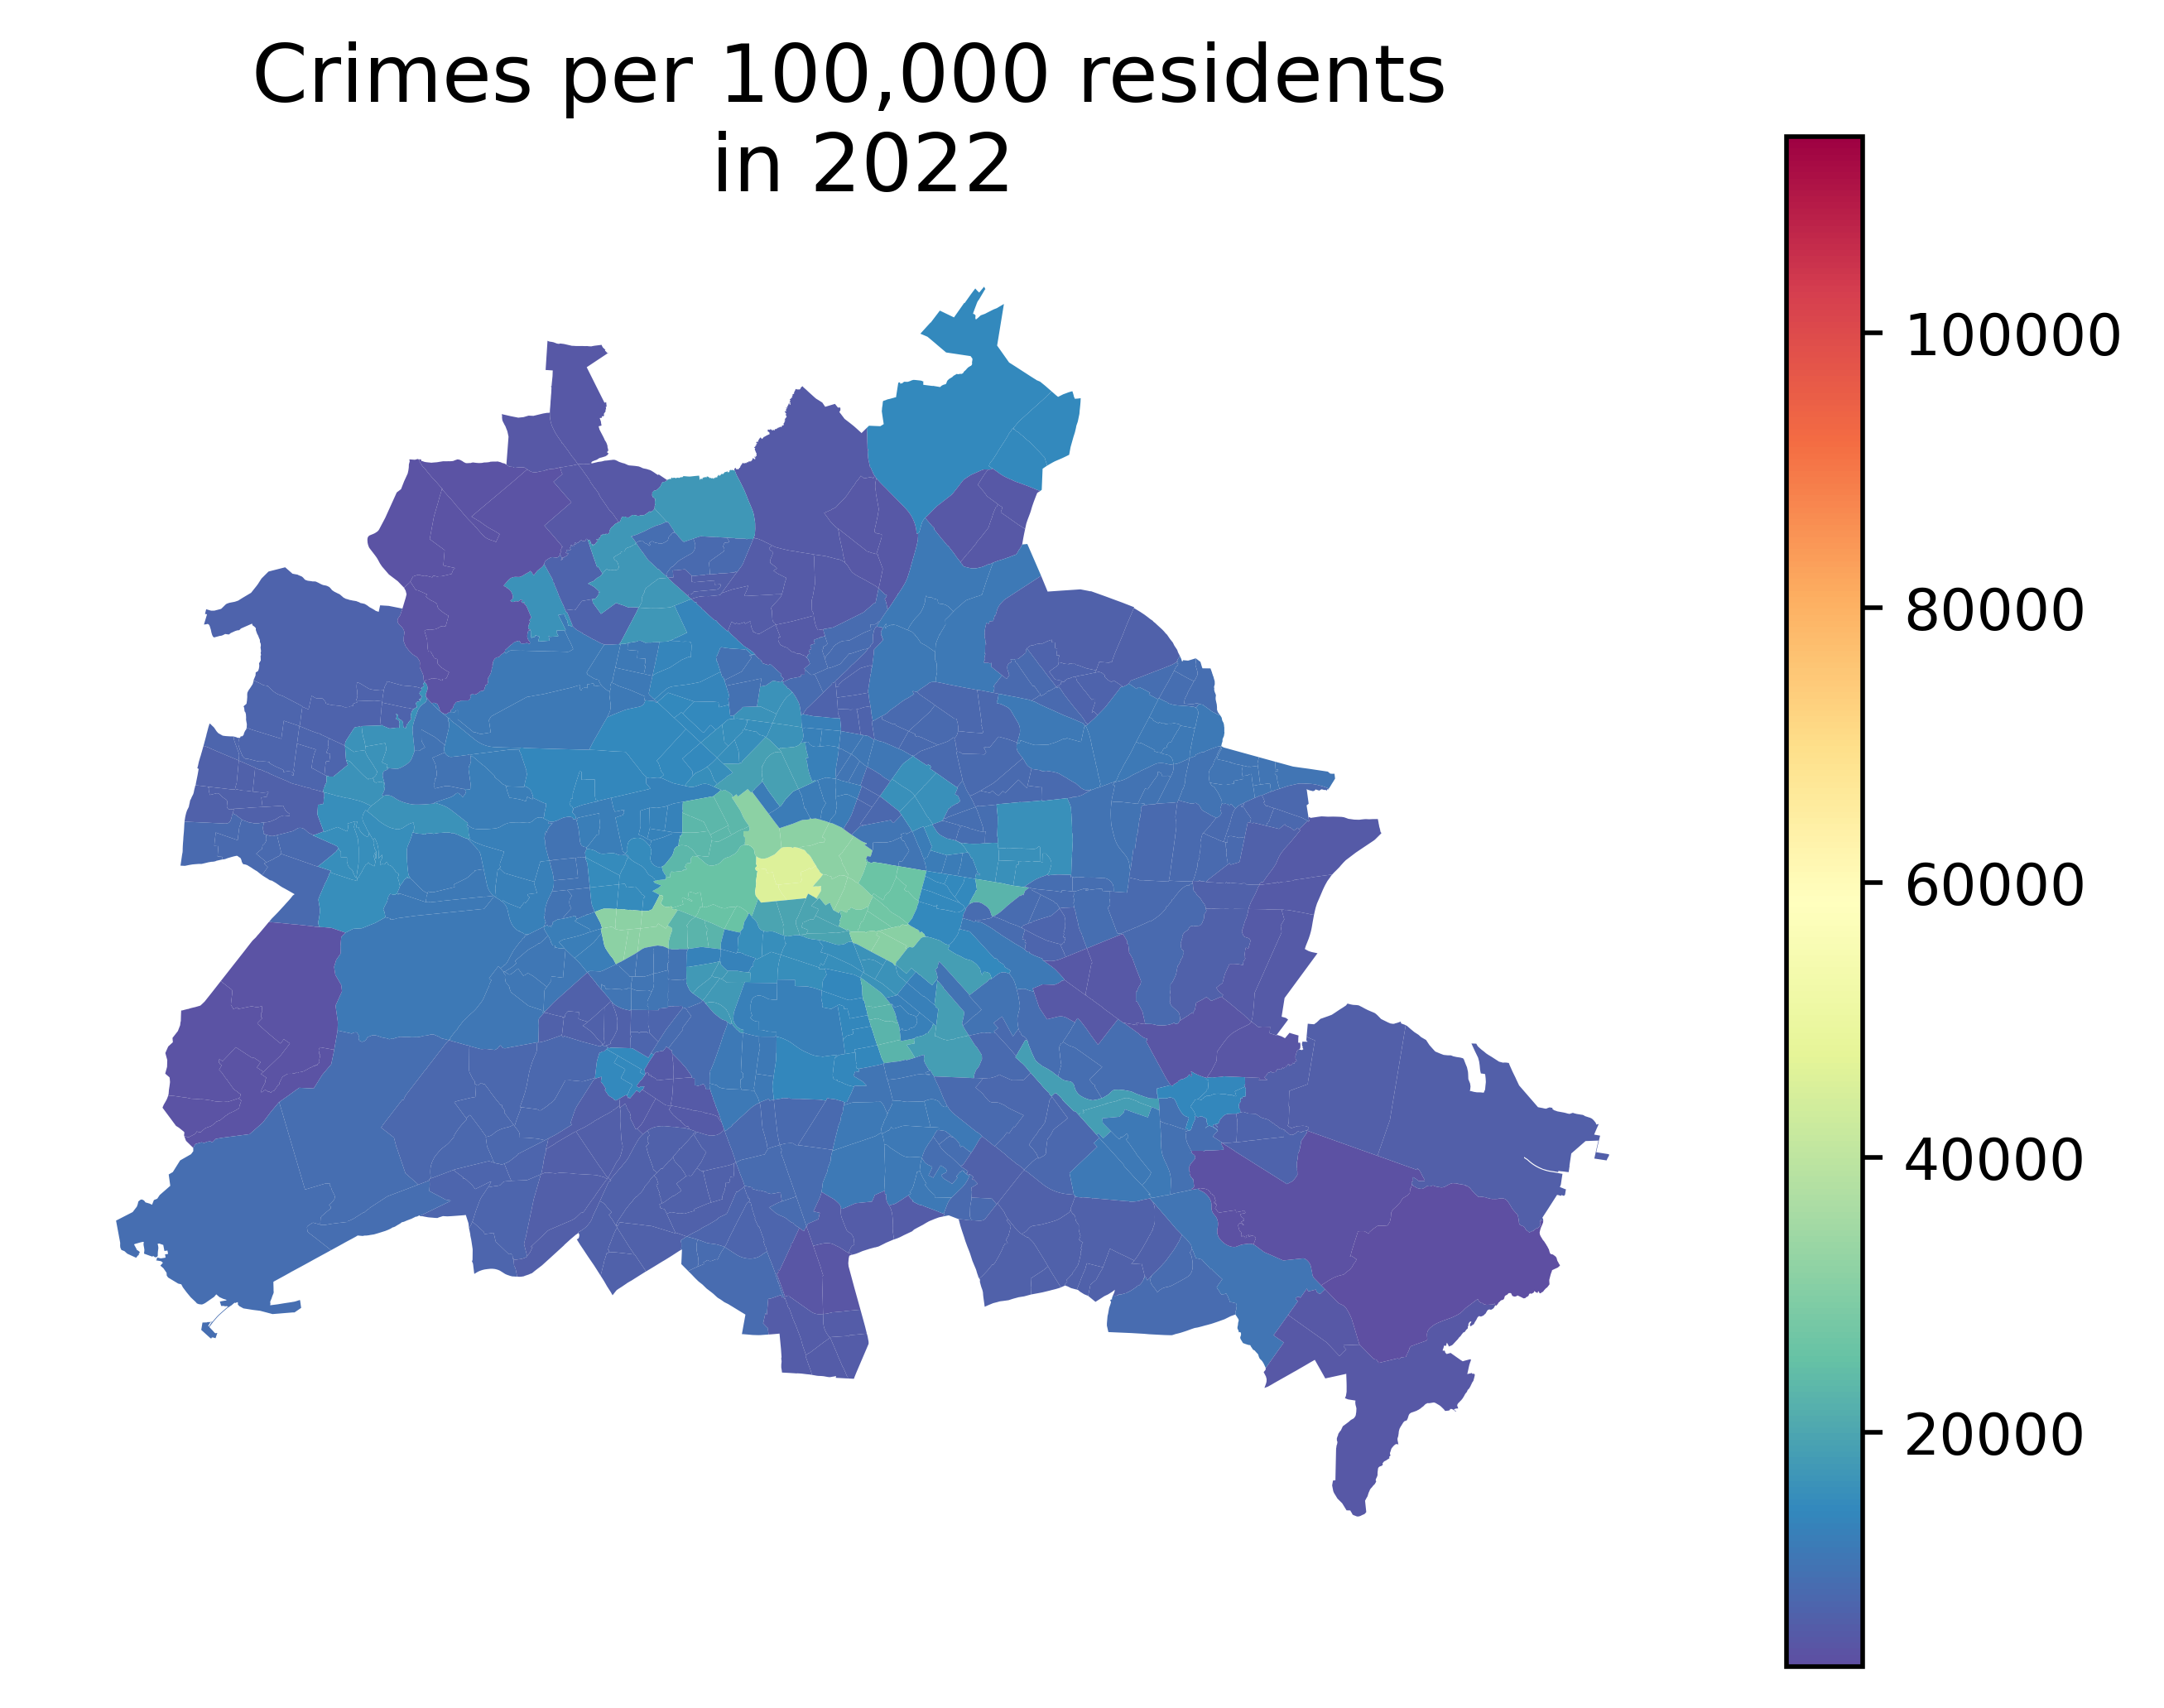

In [4]:
#import os

#output_dir = "output_heatmaps"  # Create a directory to save the output heatmaps
#os.makedirs(output_dir, exist_ok=True)

crime_dev = pd.read_pickle("../data/05_kriminalitaet_2013_bis_2022_hz.pkl")

crime_dev["Straftaten \n-insgesamt-"] = crime_dev["Straftaten \n-insgesamt-"].astype(int)

max_value = max(crime_dev["Straftaten \n-insgesamt-"])
min_value = min(crime_dev["Straftaten \n-insgesamt-"])
vmin, vmax = min_value, max_value

for year in range(2013, 2023):
    year_df = crime_dev[crime_dev['Year'] == year]
    
    straftaten_gesamt_df = year_df[["PLR_NAME", "geometry", "Straftaten \n-insgesamt-"]]
    straftaten_gesamt_df = straftaten_gesamt_df.rename(columns={"Straftaten \n-insgesamt-": "Crimes per 100.000 residents",
                                                                "PLR_NAME": "Area"})
    straftaten_gesamt_df = gpd.GeoDataFrame(straftaten_gesamt_df, geometry="geometry")
    
    fig, ax = plt.subplots()
    straftaten_gesamt_df.plot(column="Crimes per 100.000 residents", cmap="Spectral_r", legend=True,
                              ax=ax, vmin=vmin, vmax=vmax, edgecolor='None')

    #ax.set_title(f"Crimes per 100,000 residents per district \n in {year}")
    ax.set_title(f"Crimes per 100,000 residents \nin {year}", fontsize=14)

    ax.set_axis_off()
    plt.gcf().set_dpi(500)

    #output_filename = os.path.join(output_dir, f"heatmap_{year}.png")
    #plt.savefig(output_filename, dpi=500)  # Save the figure as an image

    display.display(plt.gcf())
    display.clear_output(wait=True)

    time.sleep(2)

    plt.close(fig)


```{figure} figures/heatmap_bad.gif
---
height: 600px
name: fig:crime-dev-bad
---
Temporal development (2013-2022) of crimes per 100,000 residents
per Berlin LOR sub-district - heatmap with default colormap and default colormap scale range
```

Boxplots were employed to validate the assumption, confirming the presence of significant outliers. Subsequently, for the second version, various possible maximum values for the color scale were examined, ranging from 30,000 to 50,000. Values above 30,000 still exhibited considerable homogeneity in the heatmap, while values below 50,000 made distinctions between a range of different values impossible.

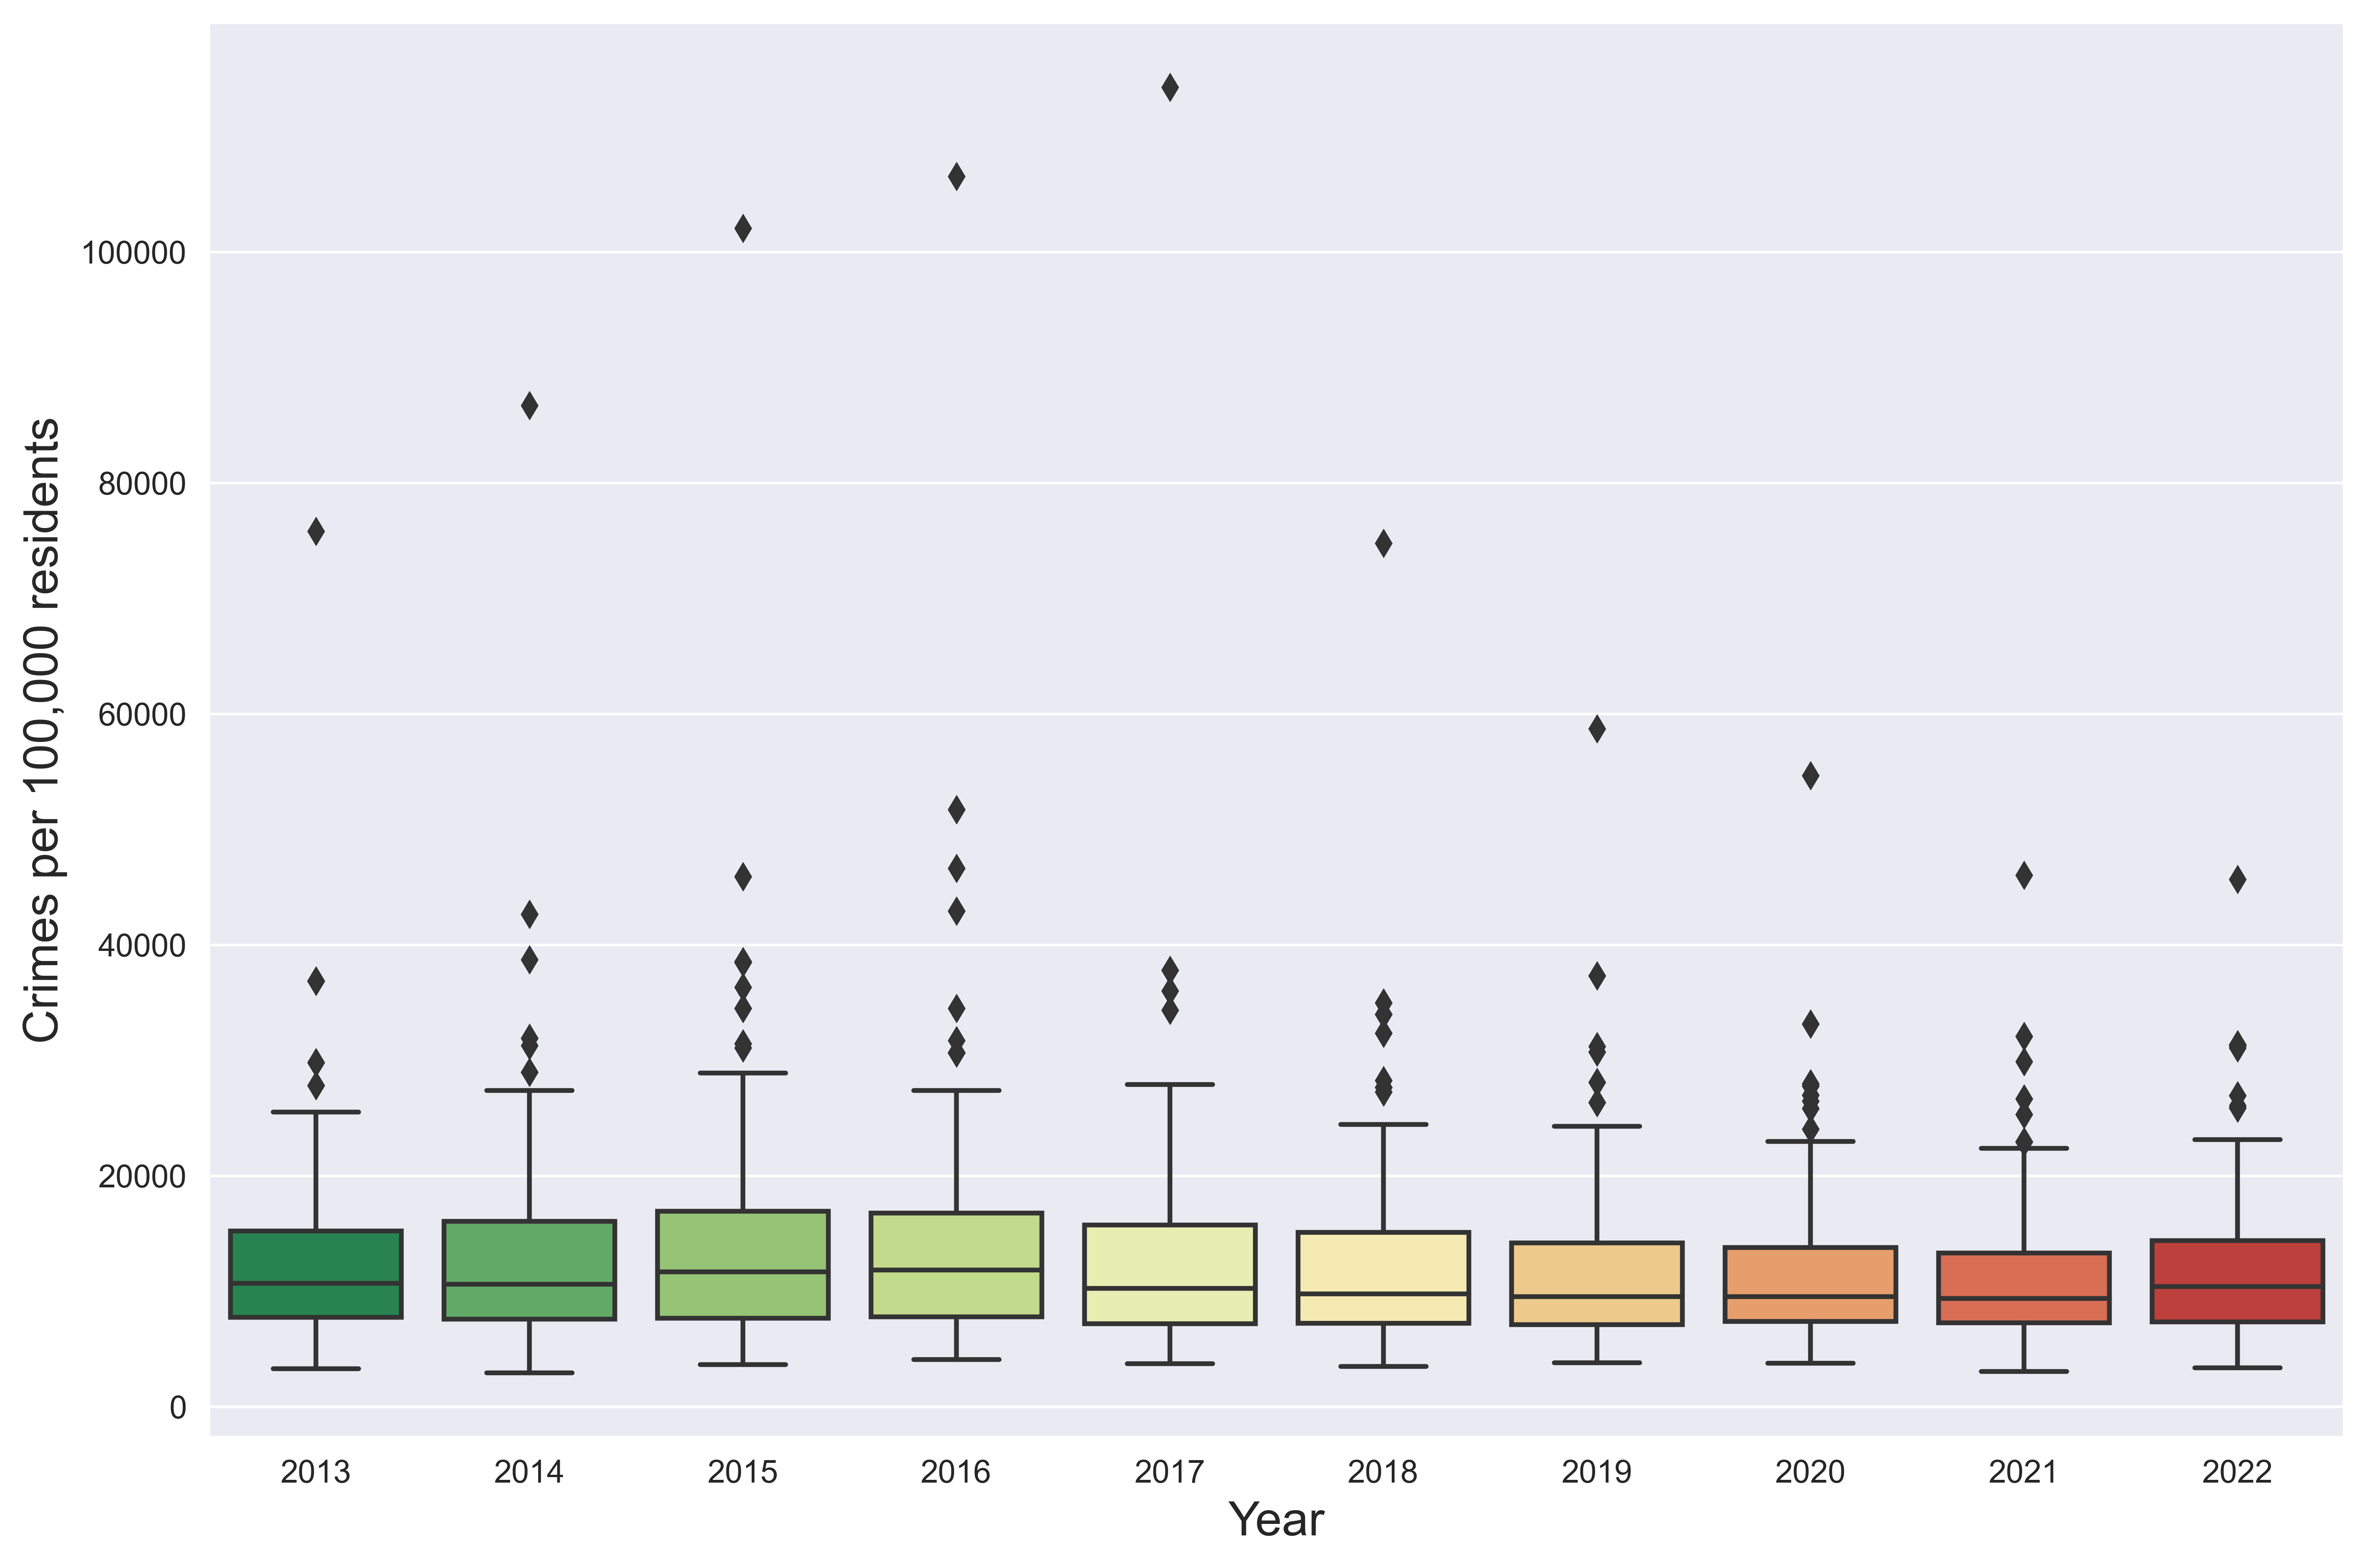

In [5]:
plt.figure(figsize=(12, 8))
sns.set_style("darkgrid")
sns.boxplot(x="Year", y="Straftaten \n-insgesamt-", data=crime_dev, palette="RdYlGn_r")
#plt.title("Number of crimes vs. year", fontsize=22)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Crimes per 100,000 residents", fontsize=15)
plt.gcf().set_dpi(500)

#plt.savefig("boxplots.svg", bbox_inches="tight", dpi=500)

plt.show()

```{figure} figures/boxplots.svg
---
height: 600px
name: fig:crime-boxplots
---
Temporal development (2013-2022) of crimes per 100,000 residents
per Berlin LOR sub-district - boxplots with default colormap
```